In [ ]:
from flash_ansr import FlashANSR, SoftmaxSamplingConfig, BeamSearchConfig, MCTSGenerationConfig, install_model, get_path
 
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [2]:
from drawdata import ScatterWidget

In [3]:
MODEL = "ansr-models/v23.0-20M"

In [4]:
# install_model(MODEL)

In [ ]:
nsr = FlashANSR.load(
    directory=get_path('models', MODEL),
    # generation_config=SoftmaxSamplingConfig(choices=1024* 32),
    # generation_config=BeamSearchConfig(beam_width=1024*4),
    # generation_config=MCTSGenerationConfig(
    #     simulations=512,
    # ),
    parsimony=0.02,
).to(device)

In [6]:
widget = ScatterWidget()
widget

In [7]:
X_raw, y_raw = widget.data_as_X_y

# Scale X_raw and y_raw to (-10, 10)
X = (X_raw - X_raw.min(axis=0)) / (X_raw.max(axis=0) - X_raw.min(axis=0)) * 20 - 10
y = (y_raw - y_raw.min(axis=0)) / (y_raw.max(axis=0) - y_raw.min(axis=0)) * 20 - 10

In [8]:
nsr.fit(X, y, verbose=True)

Fitting Constants: 100%|██████████| 32684/32684 [00:05<00:00, 5628.27it/s]


In [ ]:
nsr.get_expression()

'0.88'

In [ ]:
nsr.compile_results(parsimony=0.02)

In [ ]:
nsr.results

,log_prob,fvu,score,expression,complexity,requested_complexity,raw_beam,beam,raw_beam_decoded,function,refiner,prompt_metadata,beam_id,fit_constants,fit_covariances,fit_loss
0,-5.141664,0.983333,0.012701,[<constant>],1,None,"[1, 9, 6, 10, 2]",[6],[<constant>],<function <lambda> at 0x75cc0d511e40>,"Refiner(expression=['<constant>'], best_consta...","{'allowed_terms': [], 'include_terms': [], 'ex...",0,[0.8752407416796167],[[0.851279591858037]],5.022549e+01
1,-5.141664,0.983356,0.292711,"[sin, sin, /, pow2, +, x14, -, *, x6, -, <cons...",15,None,"[1, 9, 44, 44, 31, 36, 28, 79, 29, 30, 71, 29,...","[44, 44, 31, 36, 28, 79, 29, 30, 71, 29, 6, 32...","[sin, sin, /, pow2, +, x14, -, *, x6, -, <cons...",<function <lambda> at 0x75cc0d5134c0>,"Refiner(expression=['sin', 'sin', '/', 'pow2',...","{'allowed_terms': [], 'include_terms': [], 'ex...",1,"[0.6860862269311626, 157.35190645312662, 25.88...","[[inf, inf, inf], [inf, inf, inf], [inf, inf, ...",5.022663e+01
2,-5.141664,0.998331,0.399275,"[*, x1, *, sin, tanh, x1, /, x12, -, <constant...",20,None,"[1, 9, 30, 66, 30, 44, 52, 66, 31, 77, 29, 6, ...","[30, 66, 30, 44, 52, 66, 31, 77, 29, 6, 29, 76...","[*, x1, *, sin, tanh, x1, /, x12, -, <constant...",<function <lambda> at 0x75cc0d5125c0>,"Refiner(expression=['*', 'x1', '*', 'sin', 'ta...","{'allowed_terms': [], 'include_terms': [], 'ex...",2,[0.19527392747424357],[[inf]],5.099154e+01
3,-5.141664,0.998331,0.439275,"[*, x2, -, mult5, x2, +, <constant>, /, x16, -...",22,None,"[1, 9, 30, 67, 29, 61, 67, 28, 6, 31, 81, 29, ...","[30, 67, 29, 61, 67, 28, 6, 31, 81, 29, 56, 81...","[*, x2, -, mult5, x2, +, <constant>, /, x16, -...",<function <lambda> at 0x75cc0d513240>,"Refiner(expression=['*', 'x2', '-', 'mult5', '...","{'allowed_terms': [], 'include_terms': [], 'ex...",3,[0.851124245359932],[[inf]],5.099154e+01
4,-5.141664,0.998331,0.499275,"[*, x5, -, x5, +, x17, exp, -, /, *, x10, x17,...",25,None,"[1, 9, 30, 70, 29, 70, 28, 82, 56, 29, 31, 30,...","[30, 70, 29, 70, 28, 82, 56, 29, 31, 30, 75, 8...","[*, x5, -, x5, +, x17, exp, -, /, *, x10, x17,...",<function <lambda> at 0x75cc0d513100>,"Refiner(expression=['*', 'x5', '-', 'x5', '+',...","{'allowed_terms': [], 'include_terms': [], 'ex...",4,[-0.7520984067972437],[[inf]],5.099154e+01
5,-5.141664,0.998331,0.499275,"[-, -, x2, asin, /, x7, +, x6, /, acos, x7, <c...",25,None,"[1, 9, 29, 29, 67, 47, 31, 72, 28, 71, 31, 48,...","[29, 29, 67, 47, 31, 72, 28, 71, 31, 48, 72, 6...","[-, -, x2, asin, /, x7, +, x6, /, acos, x7, <c...",<function <lambda> at 0x75cc0d512020>,"Refiner(expression=['-', '-', 'x2', 'asin', '/...","{'allowed_terms': [], 'include_terms': [], 'ex...",5,"[1.5978138841714165, -0.3487633283096091]","[[inf, inf], [inf, inf]]",5.099154e+01
6,-5.141664,0.998331,0.499275,"[div4, -, +, x2, +, div4, sinh, x13, mult5, x1...",25,None,"[1, 9, 64, 29, 28, 67, 28, 64, 50, 78, 61, 76,...","[64, 29, 28, 67, 28, 64, 50, 78, 61, 76, 36, 2...","[div4, -, +, x2, +, div4, sinh, x13, mult5, x1...",<function <lambda> at 0x75cc0d512ac0>,"Refiner(expression=['div4', '-', '+', 'x2', '+...","{'allowed_terms': [], 'include_terms': [], 'ex...",6,[10.30346706539748],[[3988808499151039.0]],5.099154e+01
7,-5.141664,0.998331,0.519275,"[pow1_2, -, mult2, x2, *, x15, *, -, x9, -, *,...",26,None,"[1, 9, 40, 29, 58, 67, 30, 80, 30, 29, 74, 29,...","[40, 29, 58, 67, 30, 80, 30, 29, 74, 29, 30, 6...","[pow1_2, -, mult2, x2, *, x15, *, -, x9, -, *,...",<function <lambda> at 0x75cc0d511ee0>,"Refiner(expression=['pow1_2', '-', 'mult2', 'x...","{'allowed_terms': [], 'include_terms': [], 'ex...",7,[0.12341750976025644],[[inf]],5.099154e+01
8,-5.141664,0.998331,0.599275,"[/, x3, *, <constant>, +, /, /, <constant>, x1...",30,None,"[1, 9, 31, 68, 30, 6, 28, 31, 31, 6, 82, 70, 3...","[31, 68, 30, 6, 28, 31, 31, 6, 82, 70, 30, 39,...","[/, x3, *, <constant>, +, /, /, <constant>, x1...",<function <lambda> at 0x75cc0d5120c0>,"Refiner(expression=['/', 'x3', '*', '<constant...","{'allowed_terms': [], 'include_terms': [], 'ex

In [9]:
X_linspace = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

In [10]:
y_pred = [[nsr.predict(X, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]
y_pred_linspace = [[nsr.predict(X_linspace, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]

/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:19: RuntimeWarning: divide by zero encountered in divide
  return 1 / x
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:33: RuntimeWarning: divide by zero encountered in divide
  return x / y
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:173: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 5), x ** (1 / 5))
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:130: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 3), x ** (1 / 3))
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:546: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:571:

In [11]:
y_pred = y_pred[:32]
y_pred_linspace = y_pred_linspace[:32]

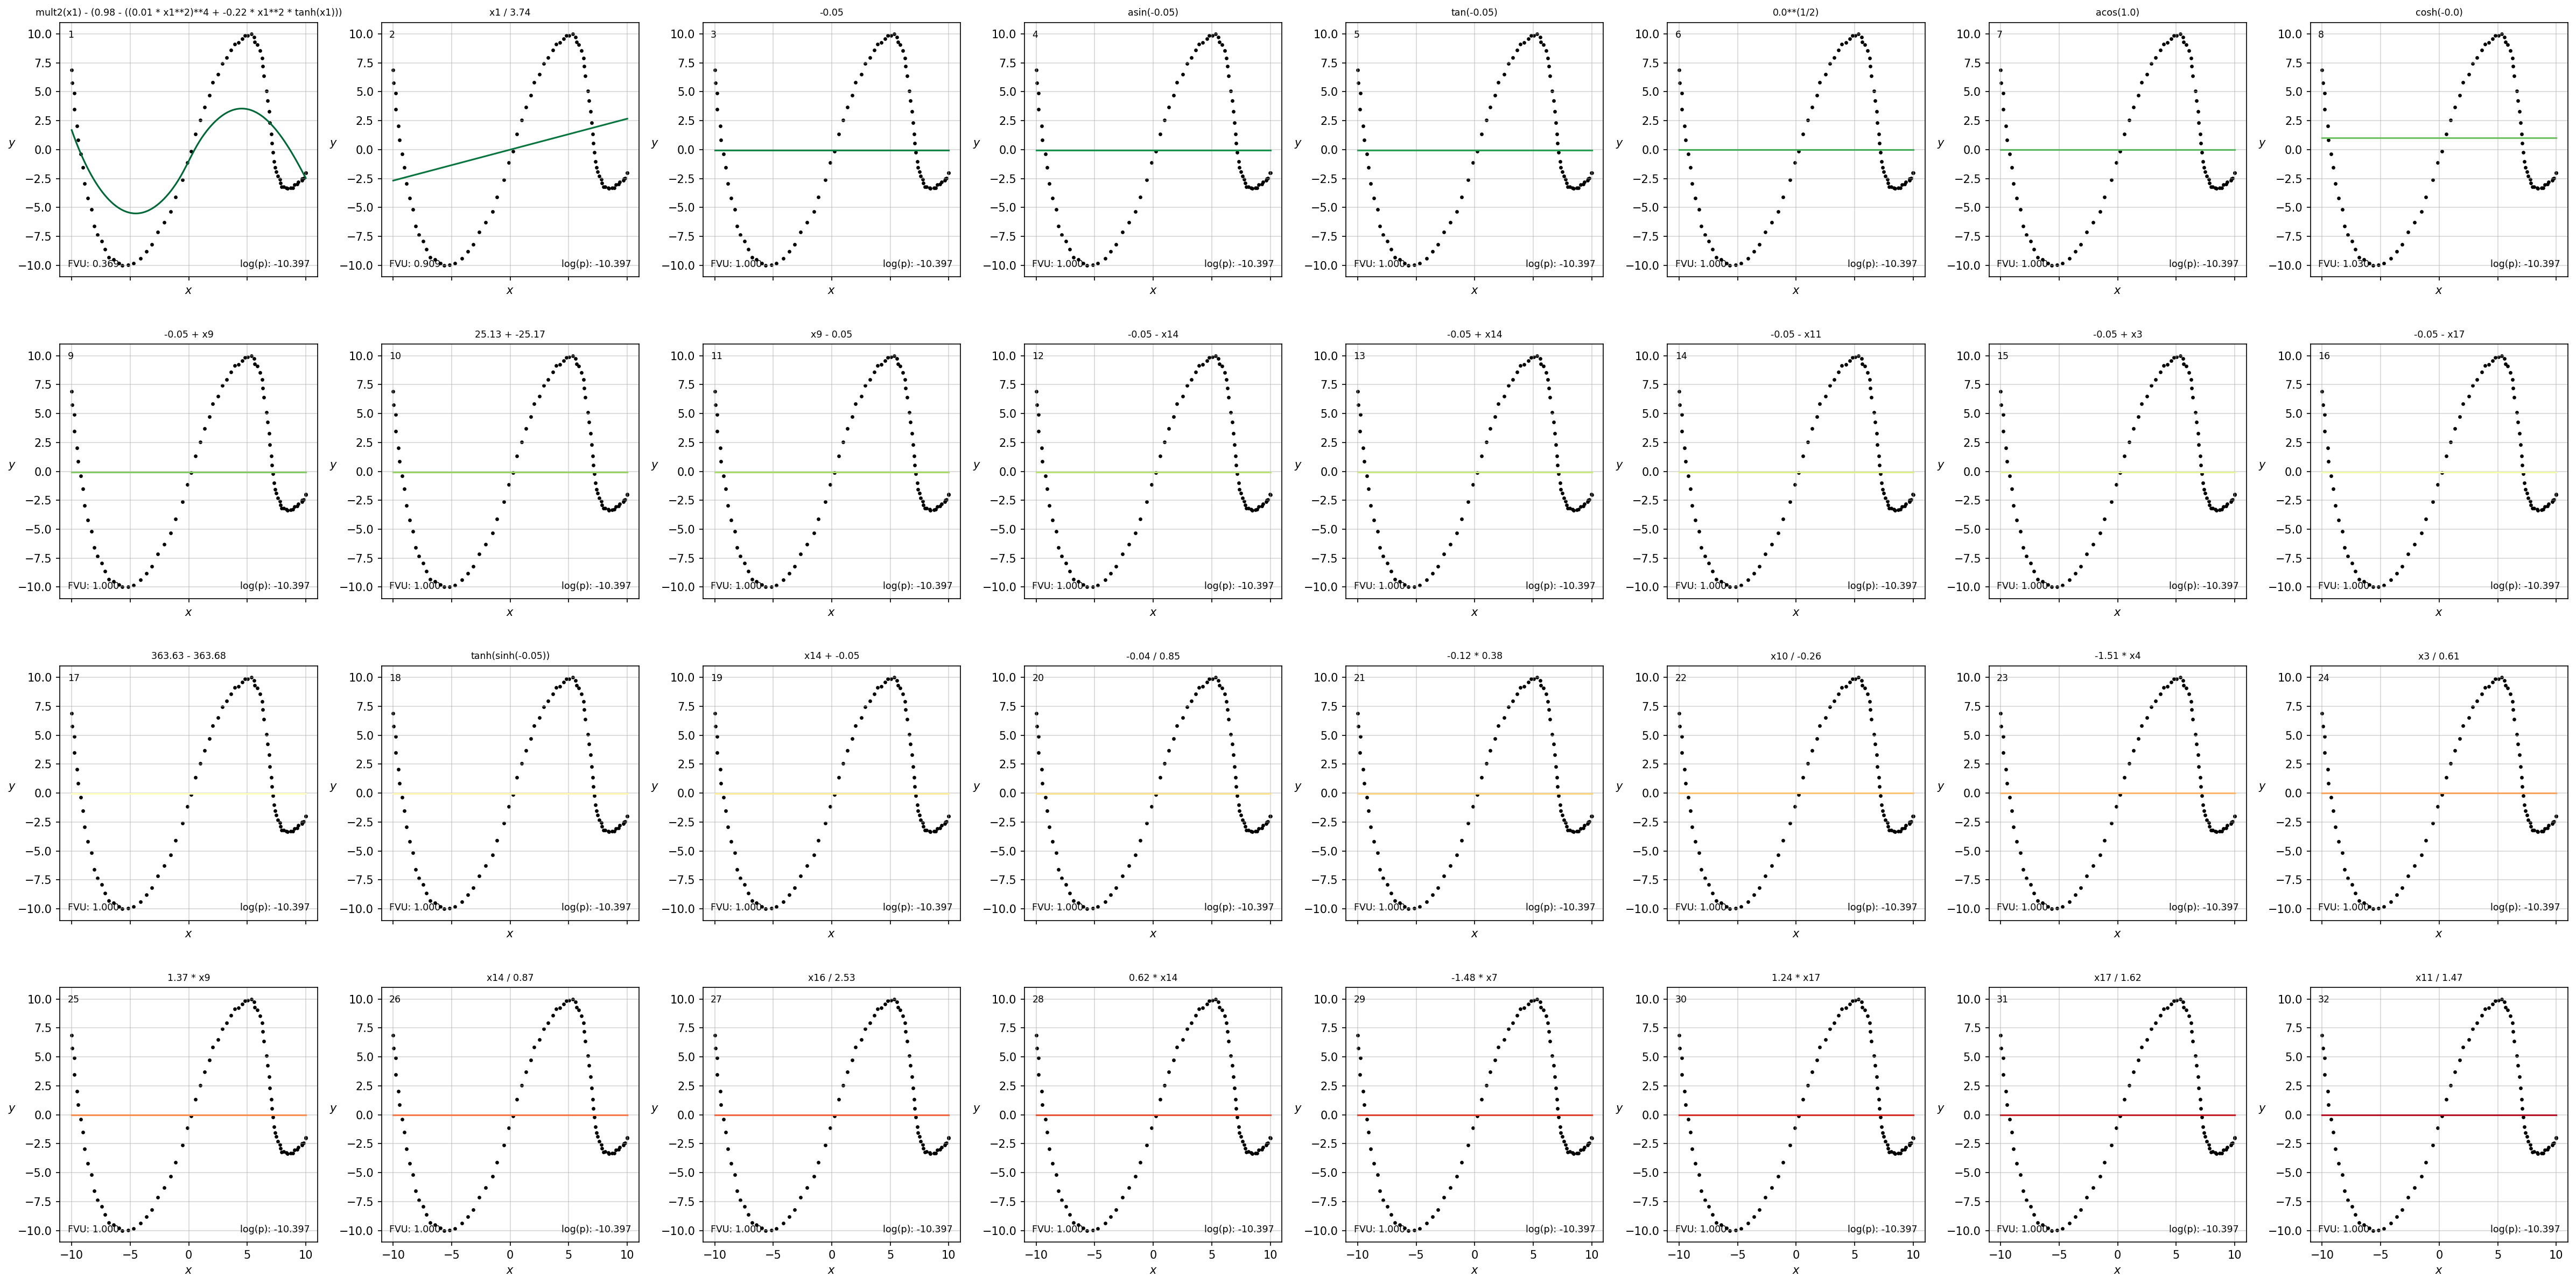

In [12]:
COLS = 8
ROWS = np.ceil(len(y_pred) / COLS).astype(int)

fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 4, ROWS * 4), dpi=150, sharex=True)

for i, ax in enumerate(axs.flat):
    if i >= len(y_pred) or len(y_pred[i]) == 0:
        ax.axis('off')
        continue
    fvu = np.mean((y_pred[i][0][:, 0] - y)**2) / np.var(y)
    expression_pred_transformed = nsr._results[i]['refiner'].transform(nsr._results[i]['expression'], 0, return_prefix=True)
    expression_pred_transformed_infix = nsr.simplipy_engine.prefix_to_infix(expression_pred_transformed, power='**')

    ax.plot(X_linspace, y_pred_linspace[i][0], color=plt.get_cmap('RdYlGn')(1 - i / len(y_pred)))
    ax.scatter(X, y, color='k', s=5)
    ax.set_title(expression_pred_transformed_infix, fontsize='small')
    
    ax.annotate(f'{i + 1}', xy=(0.03, 0.97), xycoords='axes fraction', ha='left', va='top', fontsize='small')
    ax.annotate(f'FVU: {fvu:.3f}', xy=(0.03, 0.03), xycoords='axes fraction', ha='left', va='bottom', fontsize='small')
    ax.annotate(f'log(p): {nsr._results[i]["log_prob"]:.3f}', xy=(0.97, 0.03), xycoords='axes fraction', ha='right', va='bottom', fontsize='small')

    ax.grid(alpha=0.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$', rotation=0, labelpad=5)

fig.tight_layout(h_pad=3)

Text(0, 0.5, 'Log Probability')

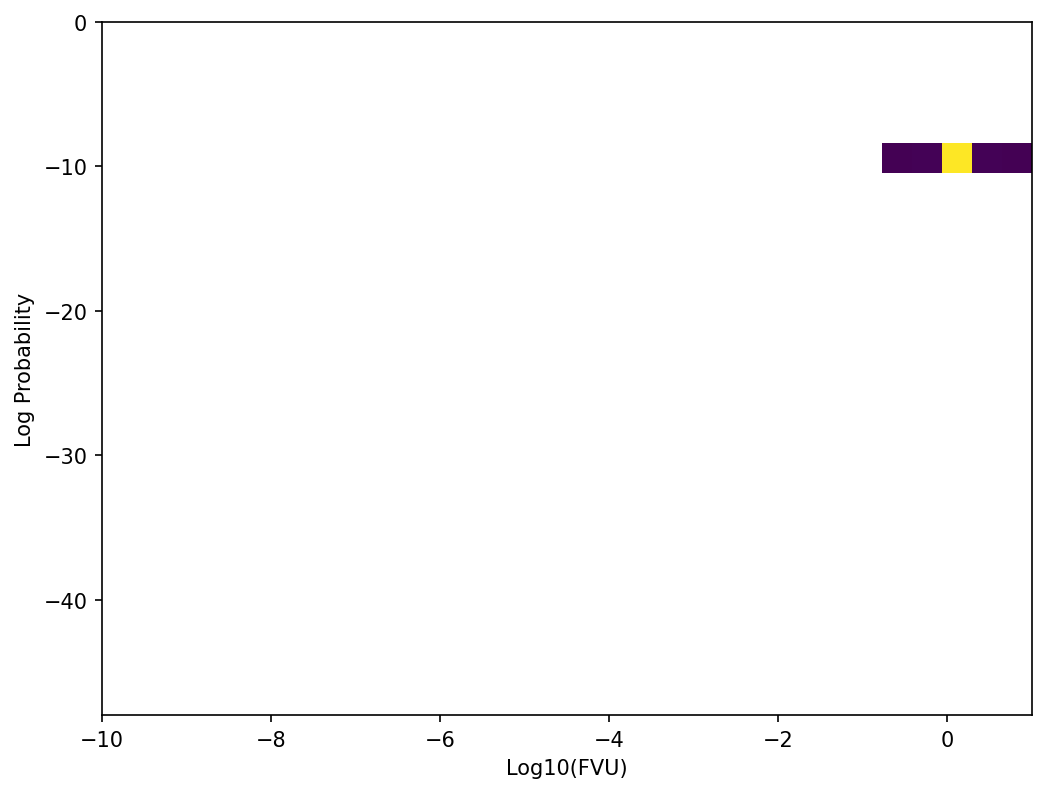

In [13]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.log10(nsr.results['fvu']), nsr.results['log_prob'], bins=(np.linspace(-10, 1, 32), np.linspace(-48, 0, 24)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Log Probability')

Text(0, 0.5, 'Log Probability')

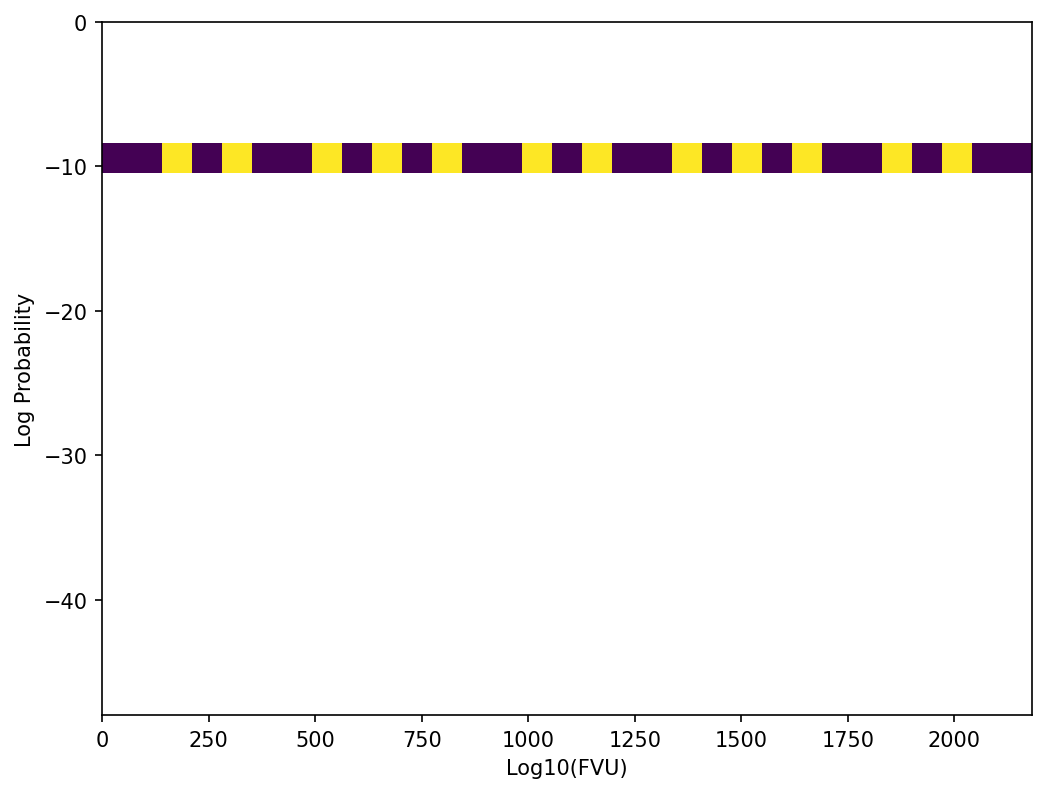

In [14]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.argsort(nsr.results['fvu']), nsr.results['log_prob'], bins=(np.linspace(-1, len(nsr.results), 32), np.linspace(-48, 0, 24)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Log Probability')

Text(0, 0.5, 'Complexity')

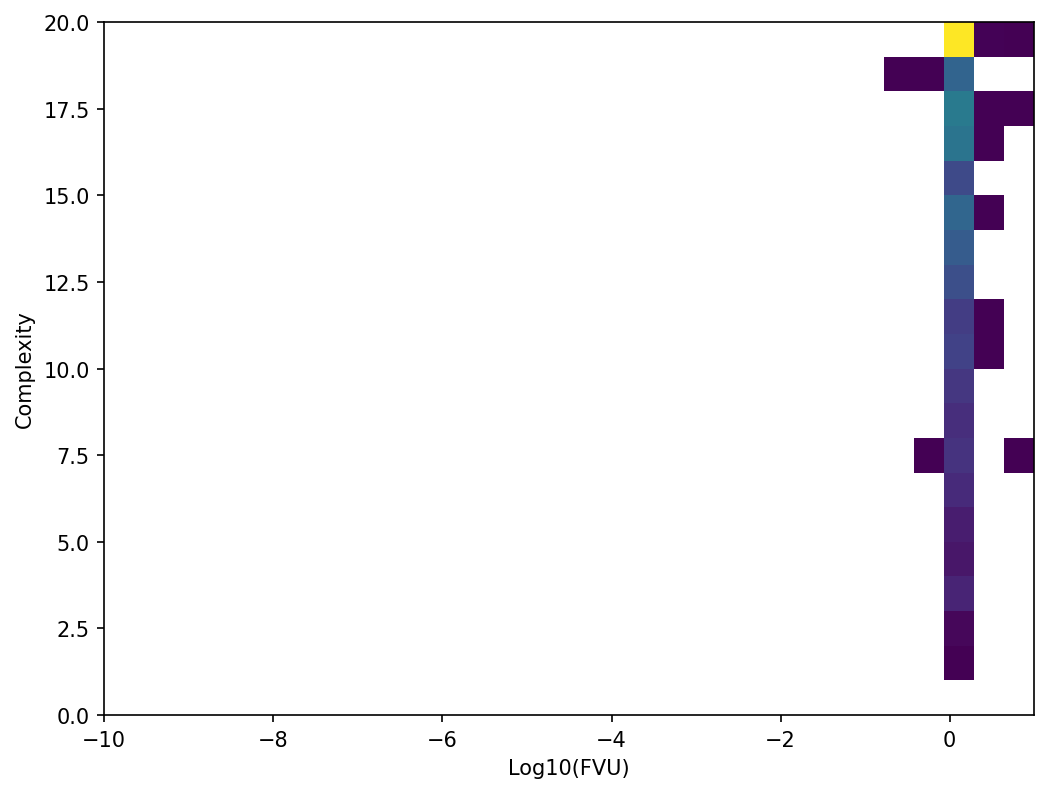

In [15]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.log10(nsr.results['fvu']), nsr.results['complexity'], bins=(np.linspace(-10, 1, 32), np.linspace(0, 20, 21)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Complexity')